In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import load_img
import cv2
from os import listdir

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [5]:
train_generator = datagen.flow_from_directory(
        'my_proj/brain_tumor_dataset/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 253 images belonging to 2 classes.


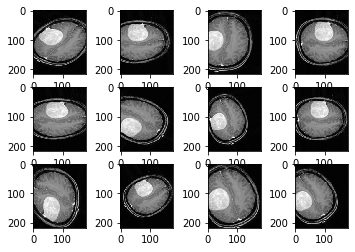

In [48]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('my_proj/brain_tumor_dataset/yes/Y1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90,width_shift_range=0.2,zoom_range=.2,)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(1,13):
	# define subplot
	pyplot.subplot(3,4,i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

TypeError: unhashable type: 'numpy.ndarray'

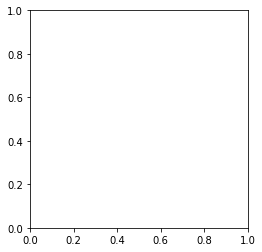

In [189]:
import cv2
  
image = cv2.imread('my_proj/brain_tumor_dataset/yes/Y4.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2XYZ)
cv2.imshow('Original image',image)
plt.imshow('Gray image', gray)
cv2.waitKey()
cv2.destroyAllWindows()


In [28]:
data.shape

(218, 180, 3)

In [53]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [70]:
for filename in listdir('my_proj/brain_tumor_dataset/yes/'):
    
    datagen = ImageDataGenerator( 
        rotation_range = 40, 
        shear_range = 0.2, 
        zoom_range = 0.2, 
        horizontal_flip = True, 
        brightness_range = (0.5, 1.5)) 
    
    # Loading a sample image  
    img = load_img('my_proj/brain_tumor_dataset/yes/'+filename)  
    # Converting the input sample image to an array 
    x = img_to_array(img) 
    # Reshaping the input image 
    x = x.reshape((1, ) + x.shape)  
   
    # Generating and saving 5 augmented samples  
    # using the above defined parameters.  

    i = 0
    for batch in datagen.flow(x, batch_size = 1, 
                          save_to_dir ='my_proj/aug/yes/',  
                          save_prefix ='aug_yes', save_format ='jpeg'): 
        i += 1
        if i > 7: 
            break

In [71]:
for filename in listdir('my_proj/brain_tumor_dataset/no/'):
    
    datagen = ImageDataGenerator(
        rotation_range = 40, 
        shear_range = 0.2, 
        zoom_range = 0.2, 
        horizontal_flip = True, 
        brightness_range = (0.5, 1.5)) 
    
    # Loading a sample image  
    img = load_img('my_proj/brain_tumor_dataset/no/'+filename)  
    # Converting the input sample image to an array 
    x = img_to_array(img) 
    # Reshaping the input image 
    x = x.reshape((1, ) + x.shape)  
   
    # Generating and saving 5 augmented samples  
    # using the above defined parameters.  

    i = 0
    for batch in datagen.flow(x, batch_size = 1, 
                          save_to_dir ='my_proj/aug/no/',  
                          save_prefix ='aug_no', save_format ='jpeg'): 
        i += 1
        if i > 11: 
            break

In [177]:
X=[]
Y=[]

In [178]:
for directory in listdir('my_proj/aug/'):
    for filename in listdir('my_proj/aug/'+ directory):
        img = load_img('my_proj/aug/'+directory+'/'+filename)
        img=img.resize((128,128))
        img=img_to_array(img)/255
        X.append(img)
        if directory=='no':
            Y.append(0)
        else :
            Y.append(1)

In [190]:
np.array(X).shape

(2271, 128, 128, 3)

In [191]:
np.array(Y).shape

(2271,)

In [175]:
df=np.array(X[0])

In [176]:
df.shape

(454, 442, 3)

In [ ]:
datagen.flow(samples, batch_size=1)